In [1]:
# Disable TensorFlow debugging info and warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2: Info and warnings not displayed 

In [29]:
#!conda install -c conda-forge nomkl     # Use nomkl to avoid kernel dying when running TF
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import annotation, misc, hyspec_cnn, hyspec_io, image_render, hyspec_stats

In [3]:
# Disable GPUs
tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
for device in visible_devices:
    assert device.device_type != 'GPU'

In [4]:
# Parameters 
rgb_ind = [35,79,122]

In [7]:
# Paths
# dataset_path = pathlib.Path('D:/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/4b_Rad_Georef_SGC_Tiles/MergedDatasetNGT')
dataset_path = pathlib.Path('/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/4b_Rad_Georef_SGC_Tiles/MergedDatasetNGT')

In [8]:
# Load dataset
dataset = tf.data.experimental.load(str(dataset_path))

In [17]:
# Class labels
class_labels = {
    "Sand": 1,
    "Zostera marina": 2,
    "Zostera marina with turf algae": 3,
    "Rockweed": 4,
    "Other algae": 5,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


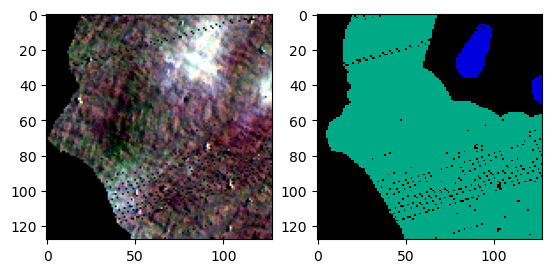

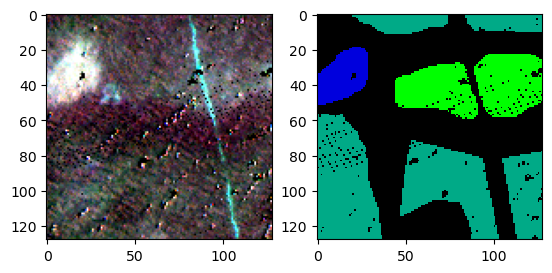

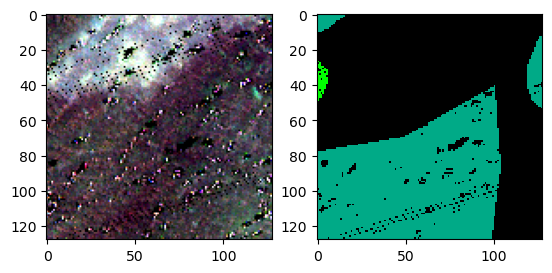

In [15]:
# Show some example tiles
index = 166
for image, labels in dataset.skip(index).take(3).prefetch(3):
# for image, labels in dataset.take(3).prefetch(1):
    #plt.imshow(labels,cmap='nipy_spectral',interpolation='none')
    #plt.show()
    fig, ax = plt.subplots(ncols=2)
    rgb_im = np.array(image)[:,:,rgb_ind]
    ax[0].imshow(image_render.percentile_stretch(rgb_im))
    ax[1].imshow(labels,vmin=0,vmax=5,interpolation='none',cmap='nipy_spectral')

In [25]:
# Collect data from every tile 
#pca_sample_data = {1:[], 2:[], 3:[], 4:[], 5:[]}
pca_sample_data = []
for image_tile, label_tile in dataset.take(3):
    pca_sample_data.append(hyspec_stats.random_sample_image(np.array(image_tile)))